# GRAPH-1: EUROPE EXCESS DEATH COUNT(COVID)

In [1]:
import pandas as pd
from tqdm.auto import tqdm

# Load the CSV file into a DataFrame
file_path = 'D:/iitb_assignment/datasets/graph1-csv/charts-pooled-by-age-group.csv'
data1 = pd.read_csv(file_path, encoding='ascii')

# Display the head of the DataFrame
print(data1.head())

    group     week  Observed count  Low normal range  High normal range  \
0  15to44  2017-51         1322.08           1119.15            1400.94   
1  15to44  2017-52         1368.02           1118.44            1401.69   
2  15to44  2018-01         1426.00           1118.02            1401.71   
3  15to44  2018-02         1358.00           1117.96            1400.94   
4  15to44  2018-03         1295.20           1118.28            1399.38   

   Baseline  Substantial increase  
0   1257.42               1549.55  
1   1257.40               1551.11  
2   1257.19               1551.38  
3   1256.79               1550.21  
4   1256.21               1547.62  


In [4]:
import pandas as pd
from tqdm.auto import tqdm

# Load the CSV file into a DataFrame
file_path = 'D:/iitb_assignment/datasets/graph1-csv/charts-pooled-by-age-group.csv'
data = pd.read_csv(file_path, encoding='ascii')

# The 'week' column contains week numbers that are not recognized as months. We need to split the year and week.
data1[['year', 'week_number']] = data1['week'].str.split('-', expand=True)

# Convert 'year' and 'week_number' to integers
data1['year'] = data1['year'].astype(int)
data1['week_number'] = data1['week_number'].astype(int)

# Display the head of the DataFrame to confirm the conversion
print(data1.head())

    group     week  Observed count  Low normal range  High normal range  \
0  15to44  2017-51         1322.08           1119.15            1400.94   
1  15to44  2017-52         1368.02           1118.44            1401.69   
2  15to44  2018-01         1426.00           1118.02            1401.71   
3  15to44  2018-02         1358.00           1117.96            1400.94   
4  15to44  2018-03         1295.20           1118.28            1399.38   

   Baseline  Substantial increase  year  week_number  
0   1257.42               1549.55  2017           51  
1   1257.40               1551.11  2017           52  
2   1257.19               1551.38  2018            1  
3   1256.79               1550.21  2018            2  
4   1256.21               1547.62  2018            3  


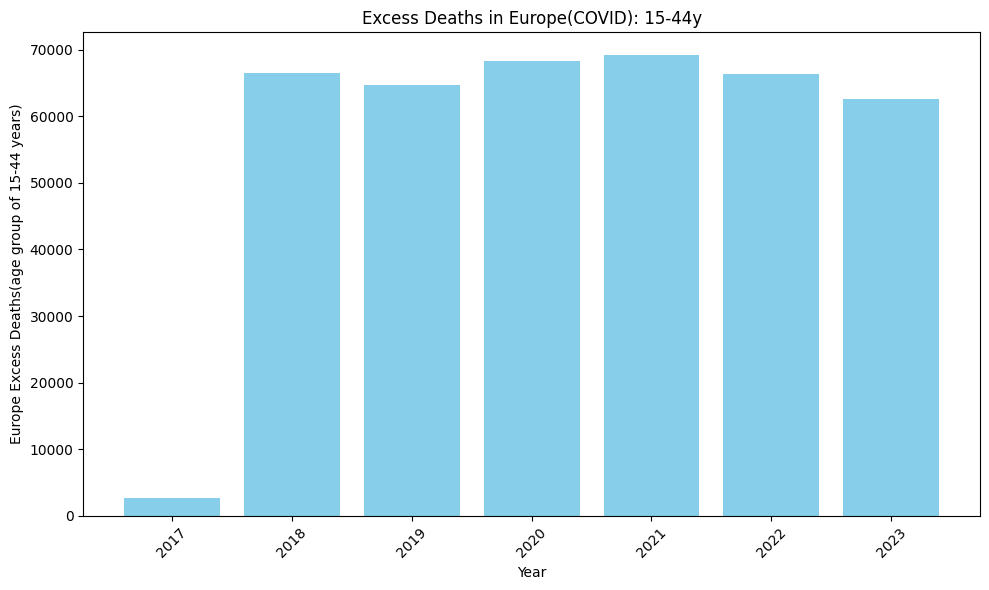

In [6]:
# Grouping the filtered data by 'Observed count' and summing the 'year'
# Group by year and sum the observed counts
import matplotlib.pyplot as plt
yearly_data = data1.groupby('year')['Observed count'].sum().reset_index()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(yearly_data['year'].astype(str), yearly_data['Observed count'], color='skyblue')
plt.title('Excess Deaths in Europe(COVID): 15-44y')
plt.xlabel('Year')
plt.ylabel('Europe Excess Deaths(age group of 15-44 years)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# GRAPH-2: INDIA LOCKDOWN VS UNLOCK IN 2020-22

In [7]:
from pathlib import Path
import pandas as pd
from tqdm.auto import tqdm

def read_all_sheets_from_excel(path: str) -> dict:
    all_sheets = pd.read_excel(path, sheet_name=None)
    for name, df in tqdm(all_sheets.items(), desc='Loading sheets'):
        df.columns = [c.strip() if isinstance(c, str) else c for c in df.columns]
        df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)
        all_sheets[name] = df
    return all_sheets

# Load the data
file_path = Path('D:/iitb_assignment/datasets/graph2-csv/India.xlsx')
dataframes = read_all_sheets_from_excel(file_path)

# Print each dataframe name and head
for k, v in dataframes.items():
    print('Dataframe name:', k)
    print(v.head())

# Select a dataframe to visualize
selected_df = list(dataframes.values())[0]

Loading sheets:   0%|          | 0/1 [00:00<?, ?it/s]

Dataframe name: Sheet1
  iso_code continent location       date  total_cases  new_cases  \
0      IND      Asia    India 2020-01-03          NaN        0.0   
1      IND      Asia    India 2020-01-04          NaN        0.0   
2      IND      Asia    India 2020-01-05          NaN        0.0   
3      IND      Asia    India 2020-01-06          NaN        0.0   
4      IND      Asia    India 2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0          20.6                   

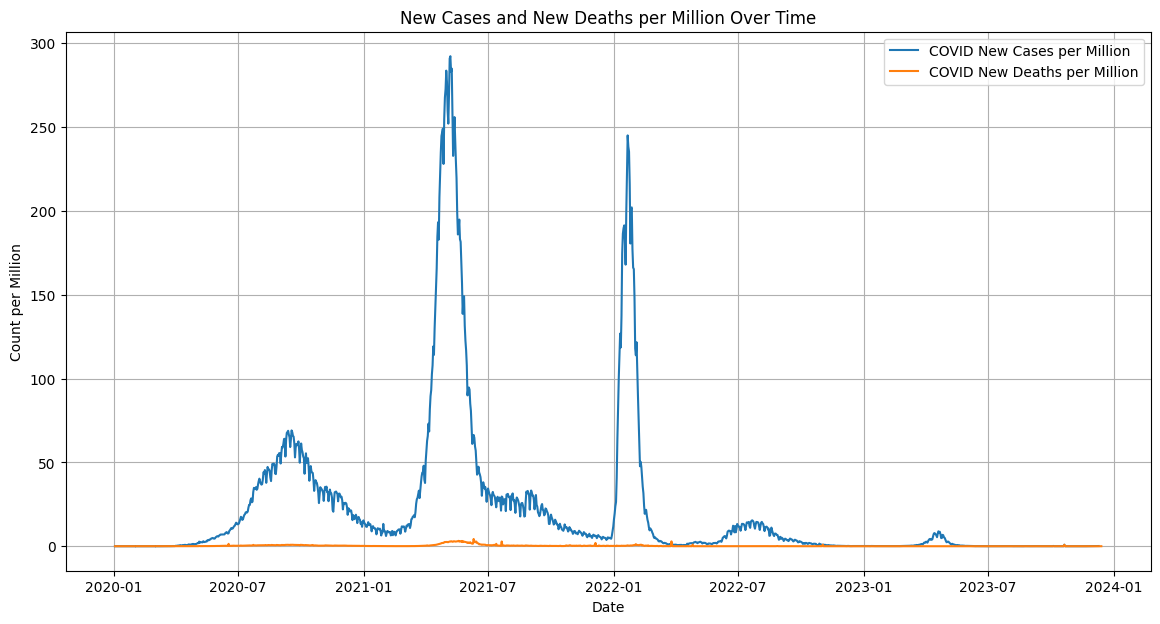

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataframes' is a dictionary of DataFrames loaded from the Excel file
# and 'selected_df' is the DataFrame we are working with.

# Convert 'date' column to datetime
selected_df['date'] = pd.to_datetime(selected_df['date'])

# Sort the DataFrame by the 'date' column
selected_df.sort_values('date', inplace=True)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(selected_df['date'], selected_df['new_cases_per_million'], label='COVID New Cases per Million')
plt.plot(selected_df['date'], selected_df['new_deaths_per_million'], label='COVID New Deaths per Million')
plt.xlabel('Date')
plt.ylabel('Count per Million')
plt.title('New Cases and New Deaths per Million Over Time')
plt.legend()
plt.grid(True)
plt.show()

# GRAPH-3: NON-COVID DEATHS IN US: 15-19 YEARS AGE GROUP

In [9]:
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

# Set tqdm to pandas to show progress bars
tqdm.pandas()

# Load the dataset
file_path = 'D:/iitb_assignment/datasets/graph3-csv/AH_Excess_Deaths_by_Sex__Age__and_Race_and_Hispanic_Origin (1).csv'
df = pd.read_csv(file_path, encoding='ascii', skip_blank_lines=True)

# Show the head of the dataframe
print(df.head())

  AnalysisDate Time Period  MMWRyear  MMWRweek  Weekending  \
0   04/23/2023   2015-2019      2015         1  01/10/2015   
1   04/23/2023   2015-2019      2016         1  01/09/2016   
2   04/23/2023   2015-2019      2017         1  01/07/2017   
3   04/23/2023   2015-2019      2018         1  01/06/2018   
4   04/23/2023   2015-2019      2019         1  01/05/2019   

               RaceEthnicity        Sex    AgeGroup  Deaths (weighted)  \
0  All Race/Ethnicity Groups  All Sexes  0-14 Years                624   
1  All Race/Ethnicity Groups  All Sexes  0-14 Years                617   
2  All Race/Ethnicity Groups  All Sexes  0-14 Years                614   
3  All Race/Ethnicity Groups  All Sexes  0-14 Years                634   
4  All Race/Ethnicity Groups  All Sexes  0-14 Years                586   

   COVID19 (weighted)  Deaths (unweighted)  COVID19 (unweighted)  \
0                   0                  624                     0   
1                   0                  617    

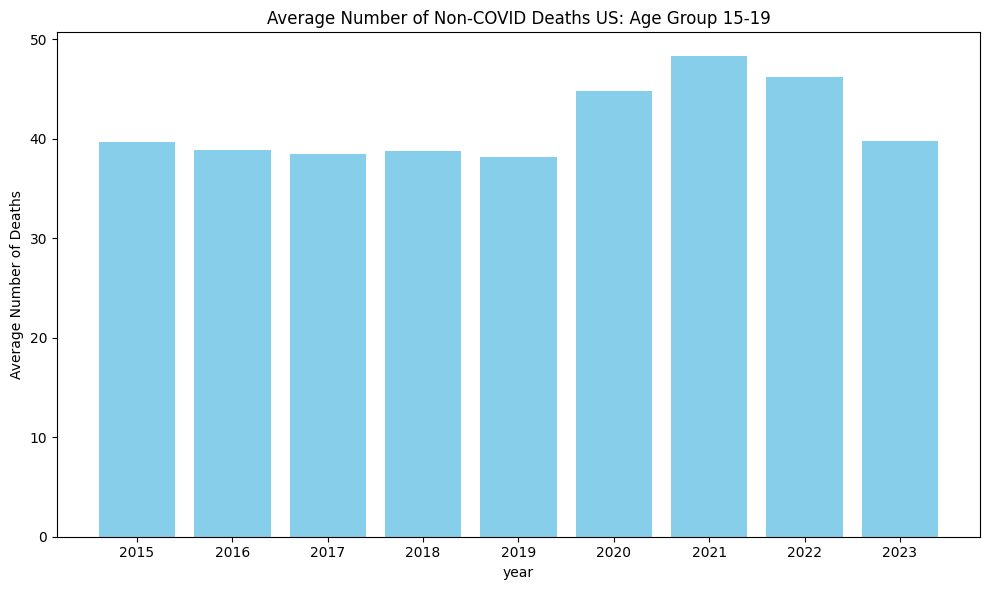

In [10]:
import matplotlib.pyplot as plt

# Filter the dataframe for the specified age group
age_group_15_19 = df[df['AgeGroup'] == '15-19 Years']

# Group by MMWRyear and calculate the average of 'Average number of deaths (unweighted)'
yearly_avg_deaths = age_group_15_19.groupby('MMWRyear')['Average number of deaths (unweighted)'].mean().reset_index()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(yearly_avg_deaths['MMWRyear'], yearly_avg_deaths['Average number of deaths (unweighted)'], color='skyblue')
plt.title('Average Number of Non-COVID Deaths US: Age Group 15-19')
plt.xlabel('year')
plt.ylabel('Average Number of Deaths')
plt.xticks(yearly_avg_deaths['MMWRyear'])
plt.tight_layout()
plt.show()

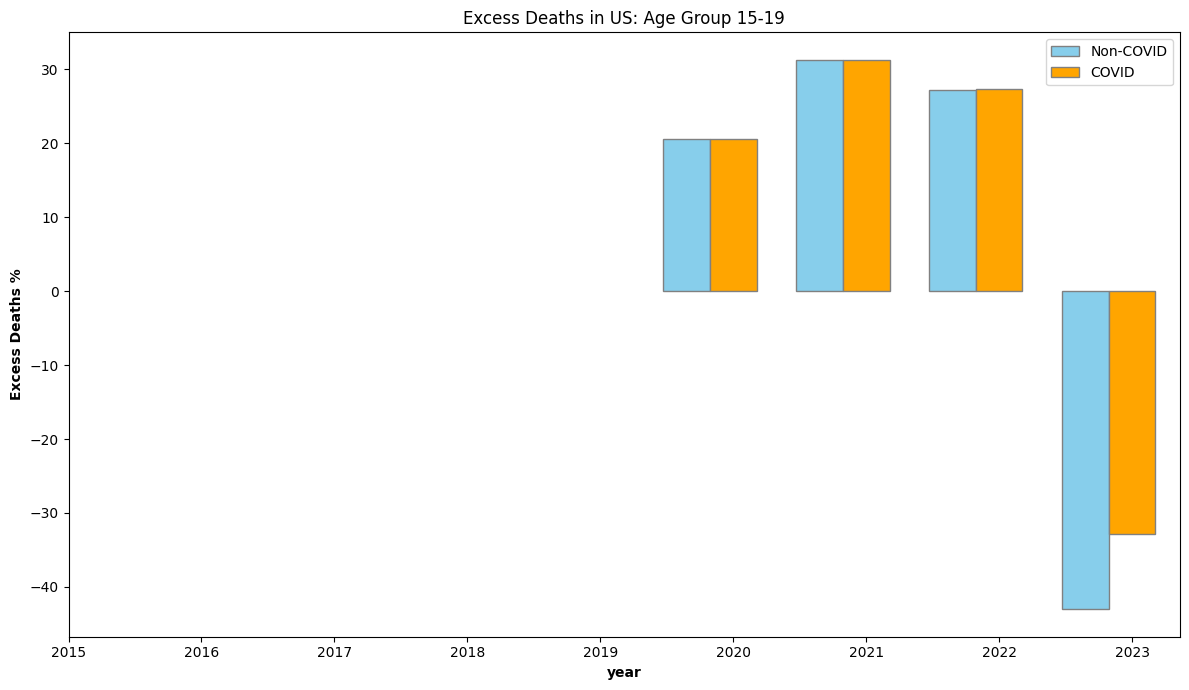

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the dataframe for the specified age group
age_group_15_19 = df[(df['AgeGroup'] == '15-19 Years') & (df['MMWRweek'] >= 14) & (df['MMWRweek'] <= 52)]

# Group by MMWRyear and calculate the average of 'Percent above average (unweighted)' and 'Percent above average (weighted)'
yearly_percent_above_avg = age_group_15_19.groupby('MMWRyear')[['Percent above average (unweighted)', 'Percent above average (weighted)']].mean().reset_index()

# Width of a bar
width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(yearly_percent_above_avg['MMWRyear']))
r2 = [x + width for x in r1]

# Make the plot
plt.figure(figsize=(12, 7))
plt.bar(r1, yearly_percent_above_avg['Percent above average (unweighted)'], color='skyblue', width=width, edgecolor='grey', label='Non-COVID')
plt.bar(r2, yearly_percent_above_avg['Percent above average (weighted)'], color='orange', width=width, edgecolor='grey', label='COVID')

# Add xticks on the middle of the group bars
plt.xlabel('year', fontweight='bold')
plt.xticks([r + width for r in range(len(r1))], yearly_percent_above_avg['MMWRyear'])
plt.ylabel('Excess Deaths %',fontweight='bold')
plt.title('Excess Deaths in US: Age Group 15-19')

# Create legend & Show graphic
plt.legend()
plt.tight_layout()
plt.show()